In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data_path = '/content/drive/My Drive/Santander Customer Satisfaction - TRAIN.csv'
test_data_path = '/content/drive/My Drive/Santander Customer Satisfaction - TEST-Without TARGET.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [4]:
train_data.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [21]:
test_data.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [5]:
X = train_data.drop(columns=["TARGET"])
y = train_data["TARGET"]

In [6]:
train_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


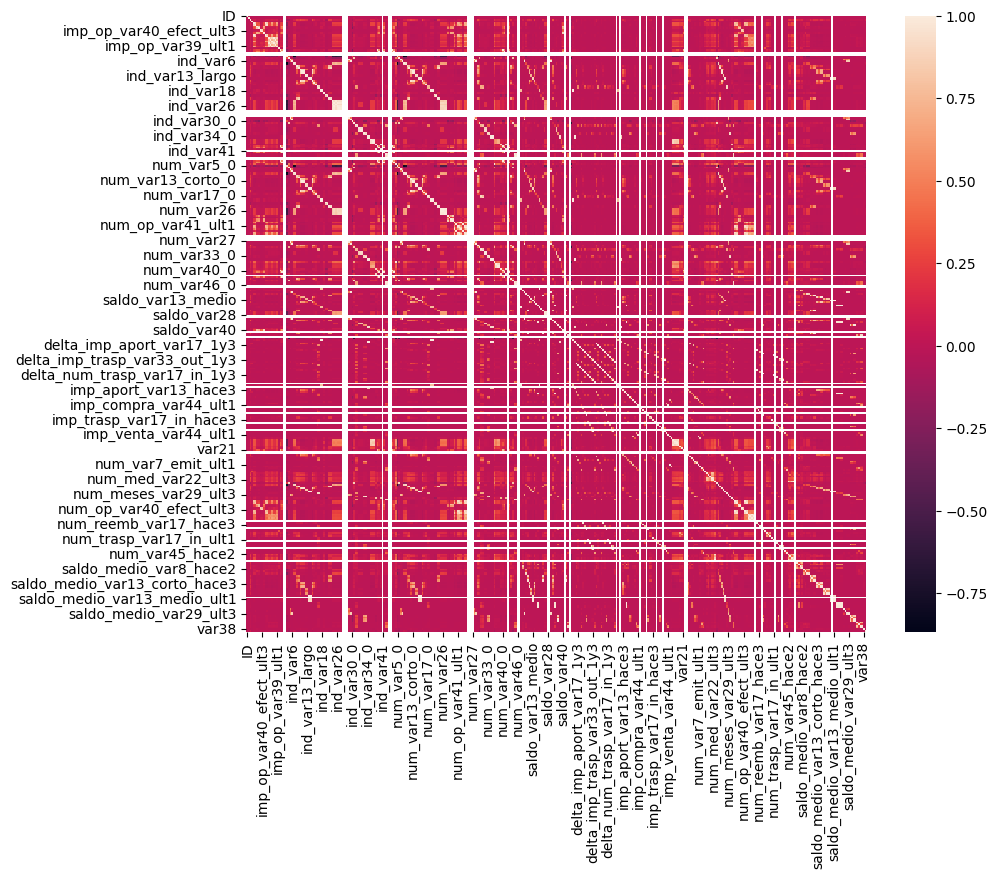

In [8]:
correlations = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations)
plt.show()

In [9]:
#  potentially irrelevant columns
irrelevant_columns = correlations["TARGET"].abs().sort_values()[:3].index
print("Irrelevant columns based on correlation:", irrelevant_columns)

Irrelevant columns based on correlation: Index(['imp_ent_var16_ult1', 'num_var37_med_ult2', 'num_op_var40_ult3'], dtype='object')


In [10]:
# Potentially relevant columns
relevant_columns = correlations["TARGET"].abs().sort_values(ascending=False)[1:4].index
print("Relevant columns based on correlation:", relevant_columns)

Relevant columns based on correlation: Index(['ind_var30', 'num_meses_var5_ult3', 'num_var30'], dtype='object')


In [11]:
# Drop irrelevant columns for model training
X = X.drop(columns=irrelevant_columns)

In [12]:
print(train_data.isnull().values.any())

False


In [13]:
from sklearn.preprocessing import StandardScaler

In [16]:
# Function to count outliers using IQR
def count_outliers_iqr(data):
    outlier_counts = {}
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Count outliers for each column
        outlier_counts[column] = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    return outlier_counts

# Get and print outlier counts
outlier_counts = count_outliers_iqr(train_data)
for col, count in outlier_counts.items():
    print(f"Outlier count in {col}: {count}")


Outlier count in ID: 0
Outlier count in var3: 1855
Outlier count in var15: 2354
Outlier count in imp_ent_var16_ult1: 3719
Outlier count in imp_op_var39_comer_ult1: 9945
Outlier count in imp_op_var39_comer_ult3: 11690
Outlier count in imp_op_var40_comer_ult1: 295
Outlier count in imp_op_var40_comer_ult3: 348
Outlier count in imp_op_var40_efect_ult1: 38
Outlier count in imp_op_var40_efect_ult3: 45
Outlier count in imp_op_var40_ult1: 229
Outlier count in imp_op_var41_comer_ult1: 9794
Outlier count in imp_op_var41_comer_ult3: 11540
Outlier count in imp_op_var41_efect_ult1: 6684
Outlier count in imp_op_var41_efect_ult3: 8648
Outlier count in imp_op_var41_ult1: 11632
Outlier count in imp_op_var39_efect_ult1: 6695
Outlier count in imp_op_var39_efect_ult3: 8660
Outlier count in imp_op_var39_ult1: 11749
Outlier count in imp_sal_var16_ult1: 96
Outlier count in ind_var1_0: 871
Outlier count in ind_var1: 286
Outlier count in ind_var2_0: 0
Outlier count in ind_var2: 0
Outlier count in ind_var5_0: 3

In [17]:
# Function to cap outliers
def cap_outliers(data):
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers to the bounds
        data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

# Apply to your data
train_data_capped = cap_outliers(train_data)


In [18]:
# Function to count outliers using IQR
def count_outliers_iqr(data):
    outlier_counts = {}
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Count outliers for each column
        outlier_counts[column] = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    return outlier_counts

# Get and print outlier counts
outlier_counts = count_outliers_iqr(train_data)
for col, count in outlier_counts.items():
    print(f"Outlier count in {col}: {count}")


Outlier count in ID: 0
Outlier count in var3: 0
Outlier count in var15: 0
Outlier count in imp_ent_var16_ult1: 0
Outlier count in imp_op_var39_comer_ult1: 0
Outlier count in imp_op_var39_comer_ult3: 0
Outlier count in imp_op_var40_comer_ult1: 0
Outlier count in imp_op_var40_comer_ult3: 0
Outlier count in imp_op_var40_efect_ult1: 0
Outlier count in imp_op_var40_efect_ult3: 0
Outlier count in imp_op_var40_ult1: 0
Outlier count in imp_op_var41_comer_ult1: 0
Outlier count in imp_op_var41_comer_ult3: 0
Outlier count in imp_op_var41_efect_ult1: 0
Outlier count in imp_op_var41_efect_ult3: 0
Outlier count in imp_op_var41_ult1: 0
Outlier count in imp_op_var39_efect_ult1: 0
Outlier count in imp_op_var39_efect_ult3: 0
Outlier count in imp_op_var39_ult1: 0
Outlier count in imp_sal_var16_ult1: 0
Outlier count in ind_var1_0: 0
Outlier count in ind_var1: 0
Outlier count in ind_var2_0: 0
Outlier count in ind_var2: 0
Outlier count in ind_var5_0: 0
Outlier count in ind_var5: 0
Outlier count in ind_var6_

In [25]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Assuming 'train_data' is your original DataFrame
# Initialize and apply robust scaler
scaler = RobustScaler()
# Convert the scaled NumPy array back to a Pandas DataFrame
train_data_scaled = pd.DataFrame(
    scaler.fit_transform(train_data.select_dtypes(include=['float64', 'int64'])),
    columns=train_data.select_dtypes(include=['float64', 'int64']).columns,
    index=train_data.index  # Preserve the original index
)

# Now you can use head()
train_data_scaled.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,-1.005261,0.0,-0.294118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.320687,0.0
1,-1.005235,0.0,0.352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.122736,0.0
2,-1.005222,0.0,-0.294118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.767906,0.0
3,-1.005169,0.0,0.529412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.833264,0.0
4,-1.005143,0.0,0.647059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214242,0.0


In [26]:
X = train_data_scaled.drop(columns=["TARGET"])
y = train_data_scaled["TARGET"]

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [37]:
dt_classifier.fit(X, y)
y_pred = dt_classifier.predict(X_val)

In [41]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [40]:
print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22806

    accuracy                           1.00     22806
   macro avg       1.00      1.00      1.00     22806
weighted avg       1.00      1.00      1.00     22806



In [42]:
test_predictions = dt_classifier.predict(test_data)

In [43]:
submission = pd.DataFrame({"ID": test_data["ID"], "TARGET": test_predictions})
submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv


In [44]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>